# College Scorecard Exploratory Analysis (WIP)

### Module Imports

In [1]:
import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[INFO] GraphLab Create v1.8.3 started. Logging: /tmp/graphlab_server_1457291947.log


In [2]:
frame = gl.SFrame.read_csv('~/Documents/kaggle/deptedu/CollegeScorecard_Raw_Data/MERGED2005_PP.csv',verbose=False)

In [3]:
frame.column_names()[:10]

['\xef\xbb\xbfUNITID',
 'OPEID',
 'opeid6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'AccredAgency',
 'INSTURL',
 'NPCURL']

###### There is a column for mean earnings 6 years after enrollment

In [4]:
frame['mn_earn_wne_p6']

dtype: str
Rows: 5436
['29400', '39500', '45200', '41200', '24100', '38800', '25600', '35100', '32800', '44000', '23500', '37300', '26000', '21100', '32500', '25400', '25400', '37800', '20500', '26900', '26900', '28000', '23100', '34300', '31400', 'PrivacySuppressed', '24900', '32200', '27300', '29700', '27000', '27900', '23500', '32300', '24500', '34500', '26100', '36500', '30800', '25600', '33100', '27600', '30300', '23000', 'PrivacySuppressed', '21600', '23700', '41000', '24200', '26800', '36300', 'PrivacySuppressed', '36700', '29400', '25100', '27200', '22200', '35900', '33600', 'PrivacySuppressed', '25700', '34700', '32300', '30900', '41600', '28500', '37400', '34700', '39000', '28500', '31500', '30800', '26300', '23600', 'PrivacySuppressed', 'PrivacySuppressed', '35100', '28500', '26100', '17600', '32700', '24000', '46300', '27200', '44200', '26200', '29600', '27600', '26700', 'PrivacySuppressed', '29900', '20400', '20400', '28200', '18700', '42700', '24900', '27100', '47300', '3

In [5]:
frame.shape

(5436, 1729)

###### There is a file that contains data for most recent cohorts. Download it here: https://s3.amazonaws.com/ed-college-choice-public/Most+Recent+Cohorts+(All+Data+Elements).csv

In [6]:
most_recent = gl.SFrame.read_csv('~/Documents/kaggle/deptedu/most_recent_data.csv',verbose=False)

###### Take a look at the earnings data

In [7]:
most_recent['mn_earn_wne_p6']

dtype: str
Rows: 7482
['26100', '37400', '38500', '39300', '21200', '35700', '25300', '34600', '30400', '39300', '30200', '25100', '19900', '38200', '31100', '25500', '34300', '23200', 'NULL', '24000', '28400', '23000', '31900', '32000', 'PrivacySuppressed', '21800', '29800', '25500', '27200', '26400', '20700', '22200', '31400', '24200', '30300', '21700', '31600', '26800', '24000', '30600', '24600', '27400', '23400', 'PrivacySuppressed', '24200', '22300', '41000', 'PrivacySuppressed', '23600', '23900', '34400', '34700', '34000', '27400', '17900', '22400', '33600', '33600', '33600', '33600', '33600', 'NULL', '30600', 'PrivacySuppressed', '25900', '40800', 'NULL', '35000', '32400', '39900', '35900', '36500', '40800', '28500', '24600', '24100', '17800', '20000', '102400', 'NULL', 'PrivacySuppressed', '29100', '23900', '23900', '23900', '20400', '14500', '27500', '20500', '39500', '24400', '38300', '24900', '22800', '25800', '26800', '15900', '27700', '19700', '19700', ... ]

###### Seems it was coerced to string in the SFrame reading. Need to kill 'NULL'  and  'PrivacySuppressed' values.

In [8]:
def kill_null(x):
    if x == 'NULL' or x == 'PrivacySuppressed':
        x = None
    return x

In [9]:
earnings_p6 = most_recent['mn_earn_wne_p6'].apply(kill_null)

In [10]:
earnings_p6 = earnings_p6.astype(float)

In [11]:
most_recent.shape

(7482, 1728)

###### Now we can begin basic exploration of the data.

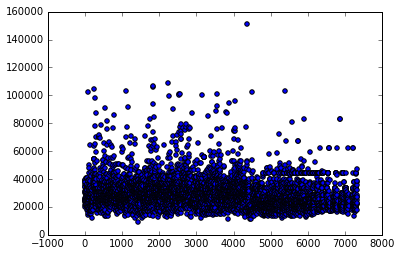

In [12]:
plt.scatter(range(most_recent.shape[0]),earnings_p6)
plt.show()